### Codio Activity 14.2:  Visualizing a Decision Tree

**Expected Time = 60 minutes**

**Total Points = 40**

This activity focuses on visualizing the results of a `DecisionTreeClassifier` using the `plot_tree` function from `sklearn`. Behind the visualization lies the `graphviz` library, and if further customization is desired you can implement a graph visualization using the Python implementation of `graphviz` [here](https://pypi.org/project/graphviz/).

#### Index

- [Problem 1](#-Problem-1)
- [Problem 2](#-Problem-2)
- [Problem 3](#-Problem-3)
- [Problem 4](#-Problem-4)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.model_selection import train_test_split

In [2]:
default = pd.read_excel('data/Default.xls', skiprows = 1, index_col = 0)

In [3]:
default.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
X = default.drop('default payment next month', axis = 1)

In [5]:
y = default['default payment next month']

[Back to top](#-Index)

### Problem 1

#### Fitting a model

**10 Points**

To being, build a `DecisionTreeClassifier` with the parameter `max_depth = 1`.  Fit the model on the training data and assign it to the variable `tree1` below.  Then, pass the `tree1` object to the `plot_tree` function with no additional arguments below.  Assign your results to `tree1_plot` below.



[Text(0.5, 0.75, 'x[5] <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'),
 Text(0.25, 0.25, 'gini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'),
 Text(0.75, 0.25, 'gini = 0.424\nsamples = 3130\nvalue = [953, 2177]')]

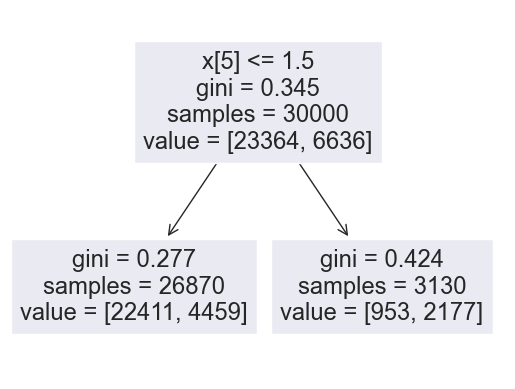

In [15]:
### GRADED
tree1 = ''
tree1_plot = ''

### BEGIN SOLUTION
tree1 = DecisionTreeClassifier(max_depth = 1).fit(X, y)
tree1_plot = plot_tree(tree1)
### END SOLUTION

# Answer check
tree1_plot

In [16]:
### BEGIN HIDDEN TESTS
tree1_ = DecisionTreeClassifier(max_depth = 1).fit(X, y)
#
#
#
assert type(tree1_) == type(tree1)
assert tree1.max_depth == tree1_.max_depth
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 2

#### Adding Feature Names

**10 Points**

The visualization above notes that `X[5] <= 1.5`.  To instead have the feature name displayed, add the argument `feature_names` and list the columns from your data `X`.  Assign your new visualization to `tree1_withnames` below. 

<center>
    <img src = 'images/tree1.png' />
</center>





[Text(0.5, 0.75, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'), Text(0.25, 0.25, 'gini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'), Text(0.75, 0.25, 'gini = 0.424\nsamples = 3130\nvalue = [953, 2177]')]


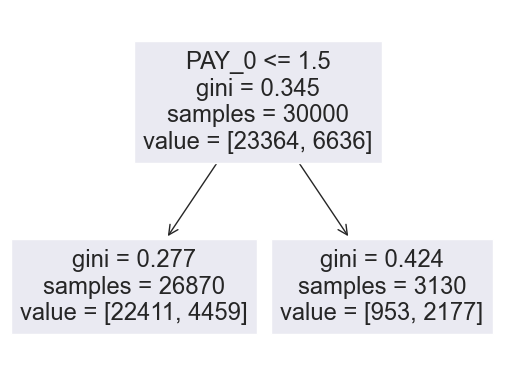

In [17]:
### GRADED

tree1_withnames = ''

### BEGIN SOLUTION
tree1_withnames = plot_tree(tree1, feature_names = list(X.columns))
### END SOLUTION

### ANSWER CHECK
print(tree1_withnames)

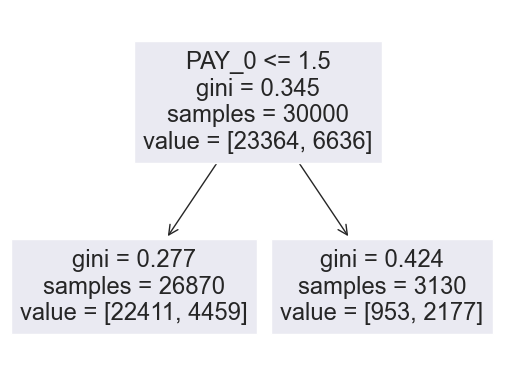

In [9]:
### BEGIN HIDDEN TESTS
tree1_withnames_ = plot_tree(tree1, feature_names = list(X.columns))
#
#
#
for stu,sol in zip(tree1_withnames, tree1_withnames_):
    assert stu.get_text() == sol.get_text()
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 3

#### Coloring the Nodes

**10 Points**

The nodes can be colored to differentiate between the categories within.  Add the argument `filled = True` to color the nodes and `feature_names = list(X.columns)`.  Assign your tree with named and colored nodes to `tree1_colored` below.



[Text(0.5, 0.75, 'PAY_0 <= 1.5\ngini = 0.345\nsamples = 30000\nvalue = [23364, 6636]'),
 Text(0.25, 0.25, 'gini = 0.277\nsamples = 26870\nvalue = [22411, 4459]'),
 Text(0.75, 0.25, 'gini = 0.424\nsamples = 3130\nvalue = [953, 2177]')]

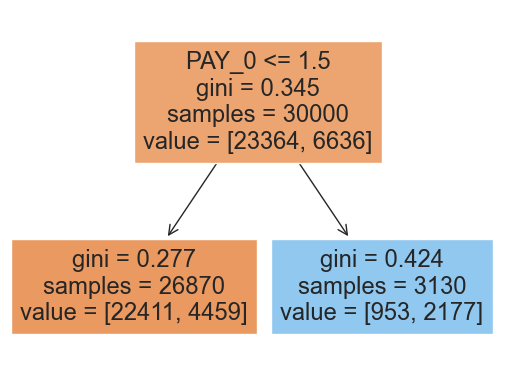

In [10]:
### GRADED


tree1_colored = ''

### BEGIN SOLUTION
tree1_colored = plot_tree(tree1, feature_names = list(X.columns), filled=True)
### END SOLUTION

# Answer check
tree1_colored

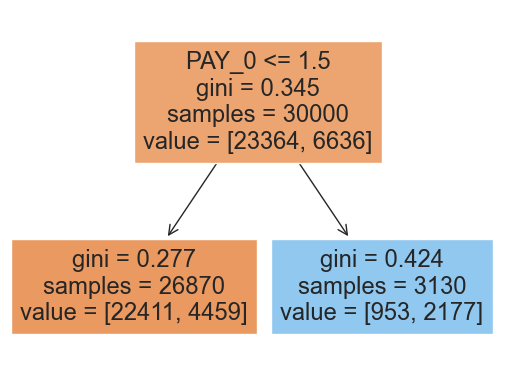

In [11]:
### BEGIN HIDDEN TESTS
tree1_colored_ = plot_tree(tree1, feature_names=X.columns, filled=True)
#
#
#
for stu,sol in zip(tree1_colored, tree1_colored_):
    assert stu.get_text() == sol.get_text()
### END HIDDEN TESTS

[Back to top](#-Index)

### Problem 4

#### A Deeper Tree

**10 Points**

Now, build a `DecisionTreeClassifier` with `max_depth = 5` setting as `tree2`.  Visualize the tree below with the feature names and nodes colored. Assign the results to `deep_tree` below.  

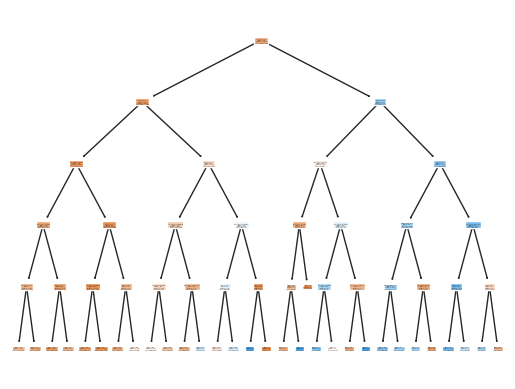

In [12]:
### GRADED
tree2 = ''
deep_tree = ''

### BEGIN SOLUTION
tree2 = DecisionTreeClassifier(max_depth = 5).fit(X, y)
deep_tree = plot_tree(tree2, feature_names=list(X.columns), filled = True)
### END SOLUTION

### ANSWER CHECK
deep_tree;

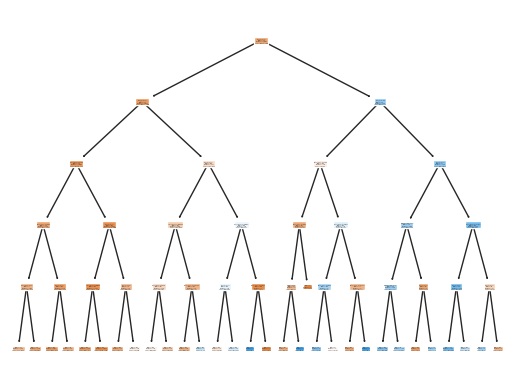

In [13]:
### BEGIN HIDDEN TESTS
tree2_ = DecisionTreeClassifier(max_depth = 5).fit(X, y)
deep_tree_ = plot_tree(tree2_, feature_names=list(X.columns), filled = True)
#
#
#
for stu,sol in zip(deep_tree, deep_tree_):
    assert stu.get_text() == sol.get_text()
    break
### END HIDDEN TESTS

#### A more readable output

As you can see, by default even a depth 5 tree is difficult to read.  To change this, you can plot the tree to a `matplotlib.axes` object with different figuresize.  Below, the same tree is plotted with a larger figure size as an example.  Despite changing this however, you should note that a simpler tree is much easier to visualize and interpret the rules.

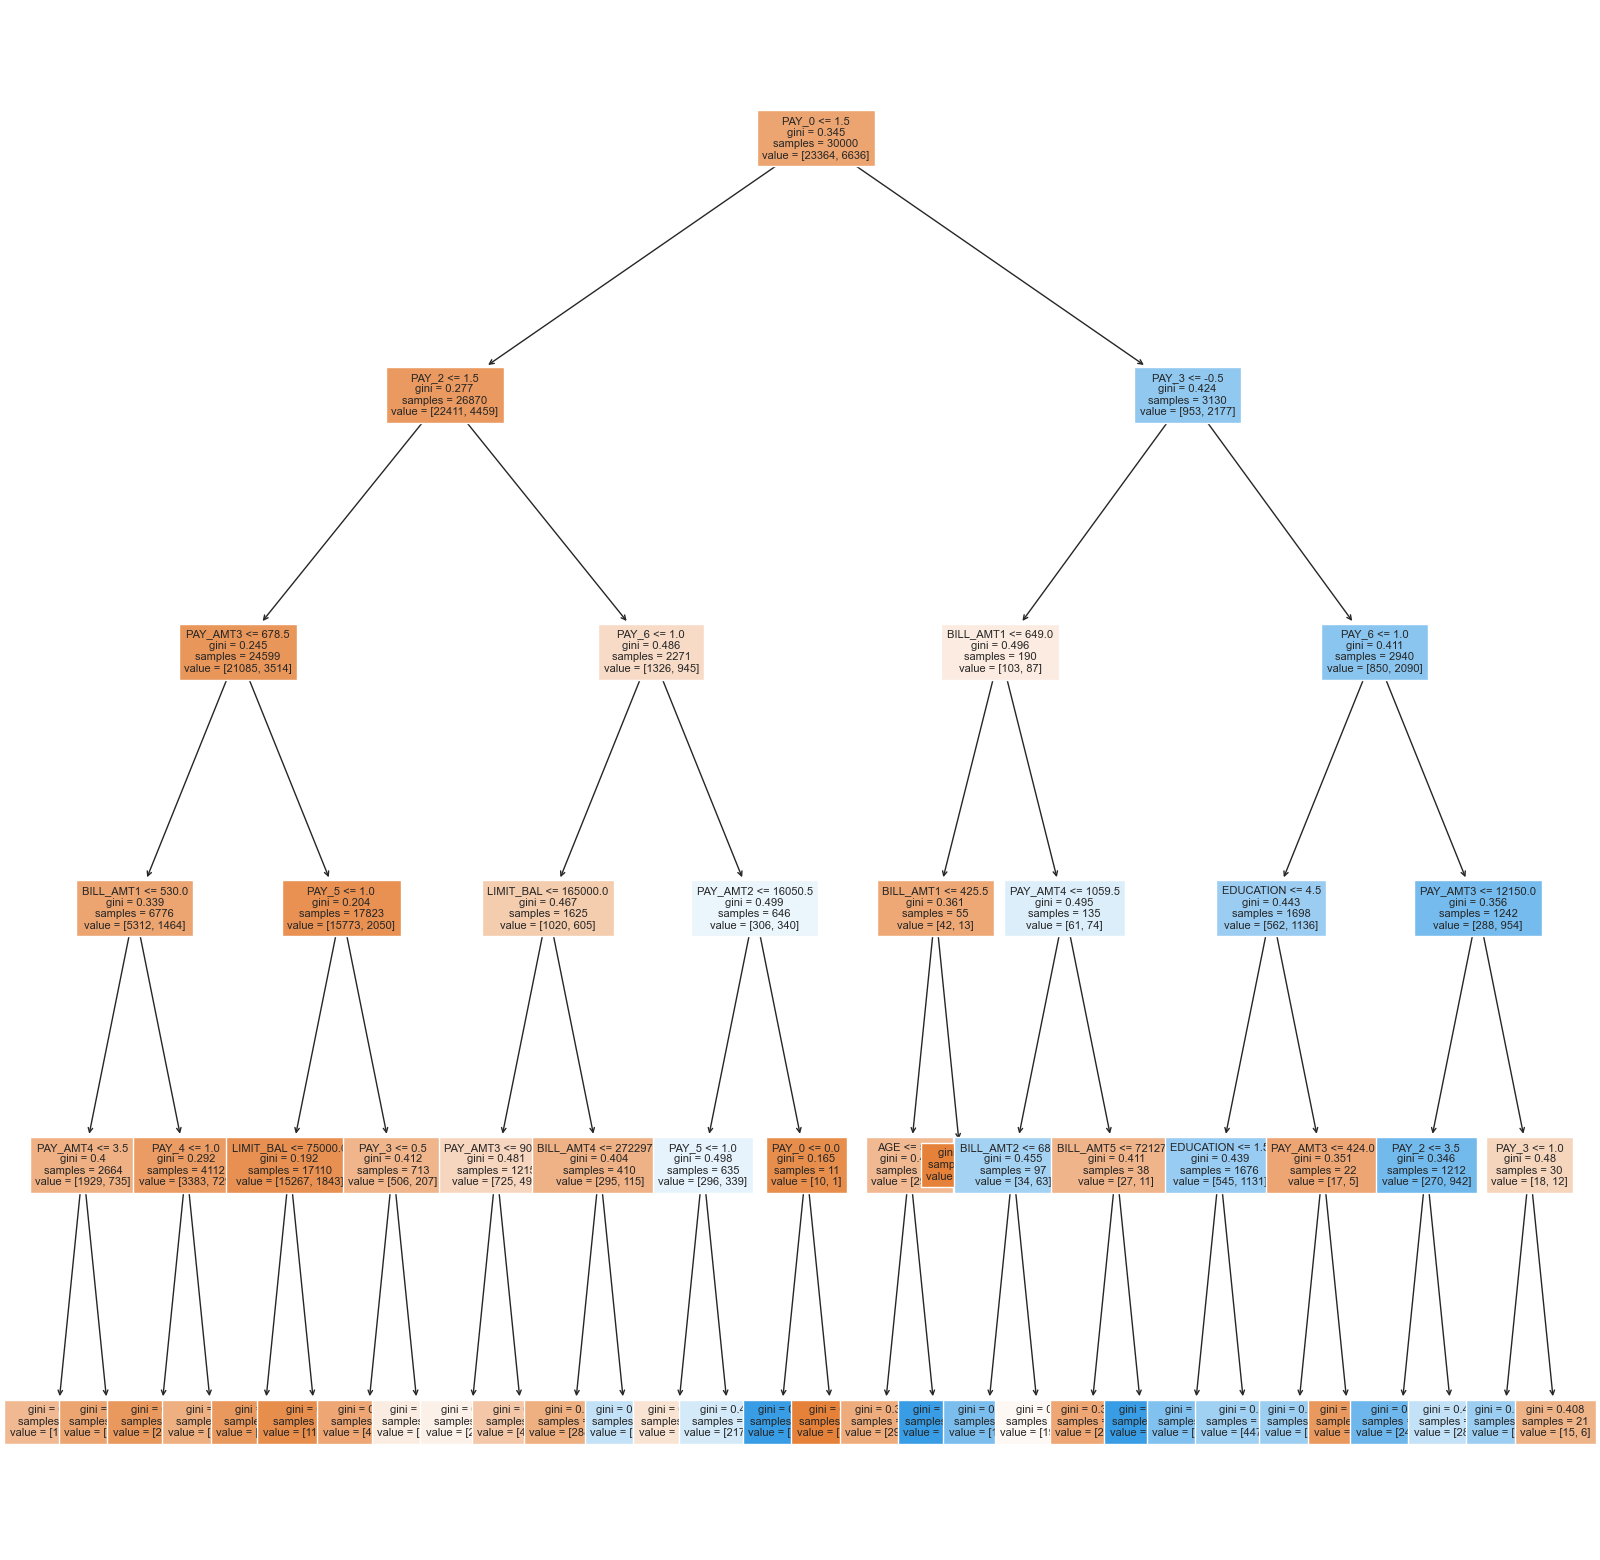

In [14]:
fig, ax = plt.subplots(figsize = (20, 20))
plot_tree(tree2, feature_names=list(X.columns), filled=True, ax = ax, fontsize=8);